# Modelos de Clasificación

## Por:
## * Eunice Yoshua Gómez Nuñez
## * Alonso de Jesús Vargas Rincón

### Preparación de herramientas y conjunto de datos

In [23]:
# Importación de librerías para:
import matplotlib.pyplot as plt # Elaboración de gráficos
import pandas as pd # Dataframes
import numpy as np 
from sklearn.ensemble import RandomForestClassifier # Modelo de Bosque aleatorio clasificador
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #Fragmentación de datos para entrenamiento y testeo
from sklearn.svm import LinearSVC # Modelo Linear SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
mipath = 'australian.dat' # Ruta del conjunto de datos
data = pd.read_csv(mipath, sep=" ", header=None) # Generación de dataframe
data.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12","A13", "A14", "class"] # Etiquetación de columnas
data.head() # Impresión de los primeros 5 elementos

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [25]:
X = data.iloc[:, :-1] # Para x se toman todas las columnas a excepción del target (Classs)
y = data[["class"]] # Para y se toma el target (class)

In [26]:
# Impresión de:
print("Total de datos: ", y.shape[0]) # Cantidad de registros (filas)
print("Total de los datos de la clase positiva: ", sum( y["class"] )) # Cantidad de 1s en el target

print("Porcentaje de datos de la clase positiva: %1f%%" %( 100*sum( y["class"] ) / y.shape[0] )) # Porcentaje de 1s en el target
print("Porcentaje de datos de la clase negativa: %1f%%" %(100*(1-sum(y["class"])/y.shape[0]))) # Porcentaje de 1s en el target


Total de datos:  690
Total de los datos de la clase positiva:  307
Porcentaje de datos de la clase positiva: 44.492754%
Porcentaje de datos de la clase negativa: 55.507246%


### Fragmentación de los datos

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=45) # Partición de datos en

In [28]:
# Impresión de cantidad de registros y campos para:
print(X_train.shape) # datos de entrenamiento de X
print(y_train.shape) # datos de entrenamiento de y
print(X_test.shape) # datos de prueba de x
print(y_test.shape) # datos de prueba de y

(414, 14)
(414, 1)
(276, 14)
(276, 1)


### Evaluación de los modelos

Random Forest Classifier

In [29]:
n_for = 10
listaEvalsRF = list() # Lista para almacenar puntuaciones

# 10 veces se repetirá lo siguiente:
for k in range(n_for):
  modelo_RF = RandomForestClassifier() # Creación de un modelo de bosque aleatorio clasificador
  modelo_RF.fit(X_train, y_train.values.ravel()) # Entrenamiento del modelo
  tmp = modelo_RF.score(X_test, y_test) # Obtención del score de precisión
  listaEvalsRF.append(tmp) # Almacenamiento de dicho score en la lista de puntuaciones

# Se imprime el promedio y la desviación estándar de todos los escores
print('Árbol de Decisión con parámetros por default\nPromedio y desviación estándar %1f%% (%.1f)' % (100*np.mean(listaEvalsRF), 100*np.std(listaEvalsRF)))
print(listaEvalsRF)

Árbol de Decisión con parámetros por default
Promedio y desviación estándar 88.695652% (0.7)
[0.8840579710144928, 0.8804347826086957, 0.8876811594202898, 0.8913043478260869, 0.9021739130434783, 0.8913043478260869, 0.8768115942028986, 0.8804347826086957, 0.8913043478260869, 0.8840579710144928]


In [30]:
listaEvalsRF_P = list()

# Nuevamente se tendrán 10 repeticiones con:
for k in range(n_for):

  # Creación del modelo pero ahora con parámetros, que son:
  modelo_RF = RandomForestClassifier(n_estimators = 100, # número de árboles aleatorios a generar para el bosque.
                                     criterion = 'gini', # función que se mide la calidad de cada división en cada nodo.
                                     max_depth=None, # profundidad máxima de cada árbol.
                                     min_samples_split=2, # profundidad máxima de cada árbol.
                                     min_samples_leaf=1, # mínimo de datos que deben quedar en cada hoja después de cada división.
                                     max_features=12) # máximo de variables a seleccionar aleatoriamente en cada árbol del bosque.
  modelo_RF.fit(X_train, y_train.values.ravel()) # Entrenamiento del modelo
  tmp = modelo_RF.score(X_test, y_test) # Obtención del score de precisión
  listaEvalsRF_P.append(tmp) # Almacenamiento de dicho score en la lista de puntuaciones

#  Impresión de la exactitud del modelo con datos de entrenamiento y datos de testeo
print("Árbol de Decisión\nExactitud(Accuracy) con parámetros ajustados:\nTrain:\t%.2f%% \nTest:\t%.2f%%"
      %(100*modelo_RF.score(X_train, y_train), 100*modelo_RF.score(X_test, y_test)))

print(listaEvalsRF_P)

Árbol de Decisión
Exactitud(Accuracy) con parámetros ajustados:
Train:	100.00% 
Test:	89.86%
[0.8913043478260869, 0.894927536231884, 0.8985507246376812, 0.9021739130434783, 0.8913043478260869, 0.9021739130434783, 0.894927536231884, 0.8840579710144928, 0.8985507246376812, 0.8985507246376812]


In [31]:
# Nuevo dataframe donde cada columna se compone de los resultados dados por los modelos evaluados en los ciclos
ddff = pd.DataFrame(list(zip(listaEvalsRF, listaEvalsRF_P)), columns=["default", "ajustado"])
ddff

,default,ajustado
0,0.884058,0.891304
1,0.880435,0.894928
2,0.887681,0.898551
3,0.891304,0.902174
4,0.902174,0.891304
5,0.891304,0.902174
6,0.876812,0.894928
7,0.880435,0.884058
8,0.891304,0.898551
9,0.884058,0.898551


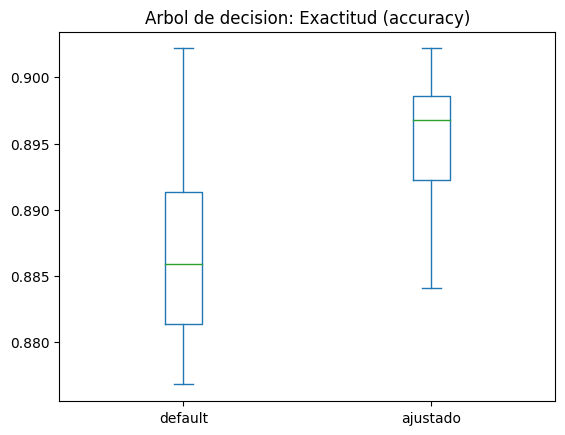

In [32]:
#Dibujamos los boxplot del dataframe
ddff.plot(kind='box')
plt.title('Arbol de decision: Exactitud (accuracy)')
plt.show()

Linear Support Vector Classifier (Linear SVC)

In [33]:
#Se crea el primer ciclo for para el modelo base. El resultado del ciclo se guarda en la variable listaEvalsvc
n_for = 10
listaEvalsvc = list()

for k in range(n_for):
  clf = make_pipeline(StandardScaler(), LinearSVC())
  #modelo_svc = LinearSVC()
  clf.fit(X_train, y_train.values.ravel())
  tmp = clf.score(X_test, y_test)
  listaEvalsvc.append(tmp)

print("SVC con parametros por default")
print("Promedio y desviacion estandar: %.1f (%.1f" % (100*np.mean(listaEvalsvc), 100*np.std(listaEvalsvc)))

SVC con parametros por default
Promedio y desviacion estandar: 90.2 (0.0


c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
#Se crea el ciclo for para el modelo con hiper parametros. El resultado de este ciclo se guarda en la variable listaEvalsvc2
n_for=10
listaEvalsvc2 = list()
for k in range(n_for):
  clf = make_pipeline(StandardScaler(), LinearSVC(C=0.1, penalty="l1", dual=False))
  #modelo_svc = LinearSVC(C=0.1, penalty="l1", dual=False)
  clf.fit(X_train,y_train)
  tmp = clf.score(X_test, y_test)
  listaEvalsvc2.append(tmp)

print("El SVC \nExactitud (accuracy)con parametros ajustados:\nTrain:\t%.2f \nTest: \t%.2f%%"%(100*clf.score(X_train,y_train),100*clf.score(X_test,y_test)))

El SVC 
Exactitud (accuracy)con parametros ajustados:
Train:	84.78 
Test: 	89.86%


c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:114

In [35]:
#Se crea el dataFrame para evualuar las listas del modelo (en este caso listaEvalsvc y listaEvalsvc2)
ddff=pd.DataFrame(list(zip(listaEvalsvc,listaEvalsvc2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.902174,0.898551
1,0.902174,0.898551
2,0.902174,0.898551
3,0.902174,0.898551
4,0.902174,0.898551
5,0.902174,0.898551
6,0.902174,0.898551
7,0.902174,0.898551
8,0.902174,0.898551
9,0.902174,0.898551


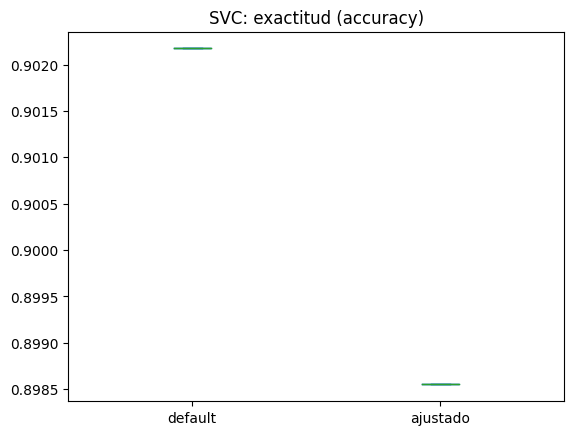

In [36]:
#Se grafica el resultado del dataFrame
ddff.plot(kind="box")
plt.title("SVC: exactitud (accuracy)")
plt.show()